# Зависимости от выбранной точности

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from functions.functions_under_study import grad_well, grad_poor, grad_rozen
from functions.optimization import momentum, nesterov, adagrad, adadelta, rmsprop, adam

In [3]:
func_names = ['f_well', 'f_poor', 'f_rozen']
grad_names = [grad_well, grad_poor, grad_rozen]
func_labels = ['Well-conditioned',
               'Poorly-conditioned',
               'Rosenbrock']

N_FUNC = len(grad_names)

In [4]:
N_EPS = 5
EPS_INIT = -1
eps_var = np.logspace(EPS_INIT, EPS_INIT-N_EPS+1, N_EPS)
print(eps_var)

[1.e-01 1.e-02 1.e-03 1.e-04 1.e-05]


In [5]:
method_names = [momentum, nesterov, adagrad, adadelta, rmsprop, adam]
N_METH = len(method_names)

x0_optim_arr     = np.empty((N_FUNC, N_METH), dtype=object)
x1_optim_arr     = np.empty((N_FUNC, N_METH), dtype=object)
iter_counter_arr = np.empty((N_FUNC, N_METH), dtype=object)
grad_counter_arr = np.empty((N_FUNC, N_METH), dtype=object)

# Начальное приближение.
x_init = np.array([-2.2, -2.2])

for ndx, grad in enumerate(grad_names):
    for mdx, meth in enumerate(method_names):
        x0_optim_list     = []
        x1_optim_list     = []
        iter_counter_list = []
        grad_counter_list = []
        for idx, eps in enumerate(eps_var):
            print(str(ndx*N_METH*N_EPS + mdx*N_EPS + idx+1), 'of', str(N_FUNC*N_METH*N_EPS) + ':', func_labels[ndx] + ',', meth.__name__ + ', eps=' + str(eps), 'Processing...')
            match meth.__name__:
                case 'momentum' | 'nesterov':
                    x_optim, _, iter_counter, grad_counter = meth(
                        grad_func=grad,
                        x_init=x_init.copy(),
                        learning_rate=1e-5,
                        beta = 0.9,
                        tolerance=eps.copy(),
                        printoutput=False
                        )
                
                case 'adagrad':
                    x_optim, _, iter_counter, grad_counter = meth(
                        grad_func=grad,
                        x_init=x_init.copy(),
                        learning_rate=1e-1,
                        eps_zero=1e-6,
                        tolerance=eps.copy(),
                        printoutput=False
                        )
                
                case 'rmsprop':
                    x_optim, _, iter_counter, grad_counter = meth(
                        grad_func=grad,
                        x_init=x_init.copy(),
                        learning_rate=1e-5,
                        beta=0.9,
                        eps_zero=1e-3,
                        tolerance=eps.copy(),
                        printoutput=False
                        )
                
                case 'adadelta':
                    x_optim, _, iter_counter, grad_counter = meth(
                        grad_func=grad,
                        x_init=x_init.copy(),
                        beta=0.9,
                        eps_zero=1e-2,
                        tolerance=eps.copy(),
                        printoutput=False
                        )
                
                case 'adam':
                    x_optim, _, iter_counter, grad_counter = meth(
                        grad_func=grad,
                        x_init=x_init.copy(),
                        learning_rate=1e-3,
                        beta1=0.95,
                        beta2=0.95,
                        eps_zero=1e-3,
                        tolerance=eps.copy(),
                        printoutput=False
                        )
                           
            x0_optim_list.append(x_optim[0])
            x1_optim_list.append(x_optim[1])
            iter_counter_list.append(iter_counter)
            grad_counter_list.append(grad_counter)
            print('Done')
        x0_optim_arr[ndx, mdx] = x0_optim_list
        x1_optim_arr[ndx, mdx] = x1_optim_list
        iter_counter_arr[ndx, mdx] = iter_counter_list
        grad_counter_arr[ndx, mdx] = grad_counter_list

1 of 90: Well-conditioned, momentum, eps=0.1 Processing...
Done
2 of 90: Well-conditioned, momentum, eps=0.01 Processing...
Done
3 of 90: Well-conditioned, momentum, eps=0.001 Processing...
Done
4 of 90: Well-conditioned, momentum, eps=0.0001 Processing...
Done
5 of 90: Well-conditioned, momentum, eps=1e-05 Processing...
Done
6 of 90: Well-conditioned, nesterov, eps=0.1 Processing...
Done
7 of 90: Well-conditioned, nesterov, eps=0.01 Processing...
Done
8 of 90: Well-conditioned, nesterov, eps=0.001 Processing...
Done
9 of 90: Well-conditioned, nesterov, eps=0.0001 Processing...
Done
10 of 90: Well-conditioned, nesterov, eps=1e-05 Processing...
Done
11 of 90: Well-conditioned, adagrad, eps=0.1 Processing...
Done
12 of 90: Well-conditioned, adagrad, eps=0.01 Processing...
Done
13 of 90: Well-conditioned, adagrad, eps=0.001 Processing...
Done
14 of 90: Well-conditioned, adagrad, eps=0.0001 Processing...
Done
15 of 90: Well-conditioned, adagrad, eps=1e-05 Processing...
Done
16 of 90: Well-

Преобразуем в таблицы.

In [6]:
col_name_x_optim = ['eps']
col_name = ['eps']
for mdx, meth in enumerate(method_names):
    col_name_x_optim.append(meth.__name__ + ' (x1)')
    col_name_x_optim.append(meth.__name__ + ' (x2)')
    col_name.append(meth.__name__)

x_optim_tbl_set      = np.empty((N_FUNC, ), dtype=object)
iter_counter_tbl_set = np.empty((N_FUNC, ), dtype=object)
grad_counter_tbl_set = np.empty((N_FUNC, ), dtype=object)
    
for ndx in range(N_FUNC):
    x_optim_tbl      = eps_var.copy()
    iter_counter_tbl = eps_var.copy()
    grad_counter_tbl = eps_var.copy()
    for colx1, colx2, col_iter, col_grad in zip(
        x0_optim_arr[ndx,:],
        x1_optim_arr[ndx,:],
        iter_counter_arr[ndx,:],
        grad_counter_arr[ndx,:]
        ):
        x_optim_tbl      = np.vstack((x_optim_tbl, colx1, colx2))
        iter_counter_tbl = np.vstack((iter_counter_tbl, col_iter))
        grad_counter_tbl = np.vstack((grad_counter_tbl, col_grad))
    
    x_optim_tbl_set[ndx] = pd.DataFrame(x_optim_tbl.T, columns=col_name_x_optim)

    iter_counter_tbl_set[ndx] = pd.DataFrame(iter_counter_tbl.T, columns=col_name)
    iter_counter_tbl_set[ndx][col_name[1:]] = iter_counter_tbl_set[ndx][col_name[1:]].astype(int)

    grad_counter_tbl_set[ndx] = pd.DataFrame(grad_counter_tbl.T, columns=col_name)
    grad_counter_tbl_set[ndx][col_name[1:]] = grad_counter_tbl_set[ndx][col_name[1:]].astype(int)

In [7]:
titles_all = [
    'Координаты минимума функции',
    'Количество итераций',
    'Количество вычислений градиента']

tables_all = np.empty((N_FUNC, ), dtype=object)
for ndx, func in enumerate(func_labels):
    tables_all[ndx] = [x_optim_tbl_set[ndx], iter_counter_tbl_set[ndx], grad_counter_tbl_set[ndx]]
    print(func)
    for ttl, tbl in zip(titles_all, tables_all[ndx]):
        print(ttl)
        display(tbl)

Well-conditioned
Координаты минимума функции


,eps,momentum (x1),momentum (x2),nesterov (x1),nesterov (x2),adagrad (x1),adagrad (x2),adadelta (x1),adadelta (x2),rmsprop (x1),rmsprop (x2),adam (x1),adam (x2)
0,0.10000,-0.065061,0.010272,-0.065060,0.010271,-0.028780,-0.028780,-0.059206,-0.002267,-0.030210,-0.028369,-0.028983,-0.027155
1,0.01000,-0.006534,0.002393,-0.006534,0.002392,-0.002884,-0.002884,-0.006596,0.002056,-0.004651,-0.001657,-0.003316,-0.001628
2,0.00100,-0.000646,0.000262,-0.000646,0.000262,-0.000287,-0.000287,-0.000648,0.000257,-0.000652,0.000112,-0.000539,0.000383
3,0.00010,-0.000064,0.000027,-0.000064,0.000027,-0.000029,-0.000029,-0.000064,0.000027,-0.000065,0.000024,-0.000054,0.000038
4,0.00001,-0.000006,0.000003,-0.000006,0.000003,-0.000003,-0.000003,-0.000006,0.000003,-0.000006,0.000003,-0.000005,0.000004


Количество итераций


,eps,momentum,nesterov,adagrad,adadelta,rmsprop,adam
0,0.10000,203754,203758,528,24188,217410,2197
1,0.01000,358538,358544,840,38529,221617,2230
2,0.00100,518864,518871,1153,54493,225477,2572
3,0.00010,679372,679382,1465,70543,230390,4425
4,0.00001,839886,839898,1777,86596,235460,6278


Количество вычислений градиента


,eps,momentum,nesterov,adagrad,adadelta,rmsprop,adam
0,0.10000,203754,407516,528,24188,217410,2197
1,0.01000,358538,717088,840,38529,221617,2230
2,0.00100,518864,1037742,1153,54493,225477,2572
3,0.00010,679372,1358764,1465,70543,230390,4425
4,0.00001,839886,1679796,1777,86596,235460,6278


Poorly-conditioned
Координаты минимума функции


,eps,momentum (x1),momentum (x2),nesterov (x1),nesterov (x2),adagrad (x1),adagrad (x2),adadelta (x1),adadelta (x2),rmsprop (x1),rmsprop (x2),adam (x1),adam (x2)
0,0.10000,-5.492851,-0.207137,-5.492851,-0.207137,-5.496476,-0.207104,-5.492864,-0.207137,-5.492864,-0.207141,-5.500676,-0.207501
1,0.01000,-5.516818,-0.207727,-5.516817,-0.207727,-5.517178,-0.207723,-5.516819,-0.207727,-5.516821,-0.207727,-5.517611,-0.207763
2,0.00100,-5.519214,-0.207786,-5.519214,-0.207786,-5.519250,-0.207785,-5.519214,-0.207786,-5.519215,-0.207786,-5.519293,-0.207789
3,0.00010,-5.519454,-0.207792,-5.519454,-0.207792,-5.519457,-0.207792,-5.519454,-0.207792,-5.519454,-0.207792,-5.519462,-0.207792
4,0.00001,-5.519478,-0.207792,-5.519478,-0.207792,-5.519478,-0.207792,-5.519478,-0.207792,-5.519478,-0.207792,-5.519479,-0.207792


Количество итераций


,eps,momentum,nesterov,adagrad,adadelta,rmsprop,adam
0,0.10000,128100,128105,2716,25603,329459,105063
1,0.01000,189417,189424,4201,31735,332690,105589
2,0.00100,250735,250744,5687,37868,334650,105963
3,0.00010,312052,312064,7172,44001,336589,106335
4,0.00001,373370,373384,8658,50134,338527,106707


Количество вычислений градиента


,eps,momentum,nesterov,adagrad,adadelta,rmsprop,adam
0,0.10000,128100,256210,2716,25603,329459,105063
1,0.01000,189417,378848,4201,31735,332690,105589
2,0.00100,250735,501488,5687,37868,334650,105963
3,0.00010,312052,624128,7172,44001,336589,106335
4,0.00001,373370,746768,8658,50134,338527,106707


Rosenbrock
Координаты минимума функции


,eps,momentum (x1),momentum (x2),nesterov (x1),nesterov (x2),adagrad (x1),adagrad (x2),adadelta (x1),adadelta (x2),rmsprop (x1),rmsprop (x2),adam (x1),adam (x2)
0,0.10000,0.897282,0.804678,0.897282,0.804678,0.909654,0.827208,0.897289,0.804690,0.901796,0.812746,0.959538,0.920333
1,0.01000,0.988919,0.977916,0.988919,0.977916,0.990325,0.980715,0.988919,0.977917,0.988921,0.977921,0.995739,0.991458
2,0.00100,0.998883,0.997763,0.998883,0.997763,0.999025,0.998049,0.998883,0.997763,0.998883,0.997763,0.999571,0.999139
3,0.00010,0.999888,0.999776,0.999888,0.999776,0.999902,0.999805,0.999888,0.999776,0.999888,0.999776,0.999957,0.999914
4,0.00001,0.999989,0.999978,0.999989,0.999978,0.999990,0.999980,0.999989,0.999978,0.999989,0.999978,0.999996,0.999991


Количество итераций


,eps,momentum,nesterov,adagrad,adadelta,rmsprop,adam
0,0.10000,311412,311459,483955,50295,326980,11558
1,0.01000,833358,833408,1048867,102490,350649,12676
2,0.00100,1403927,1403980,1651141,159548,368821,13549
3,0.00010,1979870,1979924,2257506,217144,387035,14424
4,0.00001,2556355,2556412,2864285,274793,405265,15300


Количество вычислений градиента


,eps,momentum,nesterov,adagrad,adadelta,rmsprop,adam
0,0.10000,311412,622918,483955,50295,326980,11558
1,0.01000,833358,1666816,1048867,102490,350649,12676
2,0.00100,1403927,2807960,1651141,159548,368821,13549
3,0.00010,1979870,3959848,2257506,217144,387035,14424
4,0.00001,2556355,5112824,2864285,274793,405265,15300


# Графики

In [8]:
user_figsize = (12, 6)
user_fontsize = 16
user_markersize = 12
line_style = ['-', '-.', '-', '-', '-', '-.']

## Координаты минимума функции

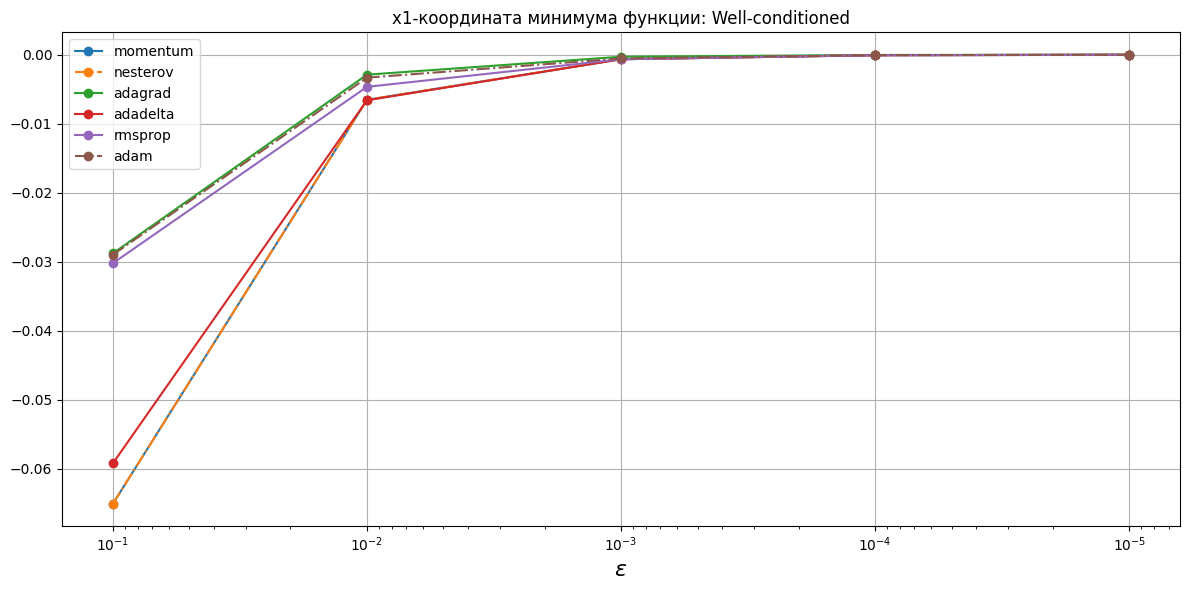

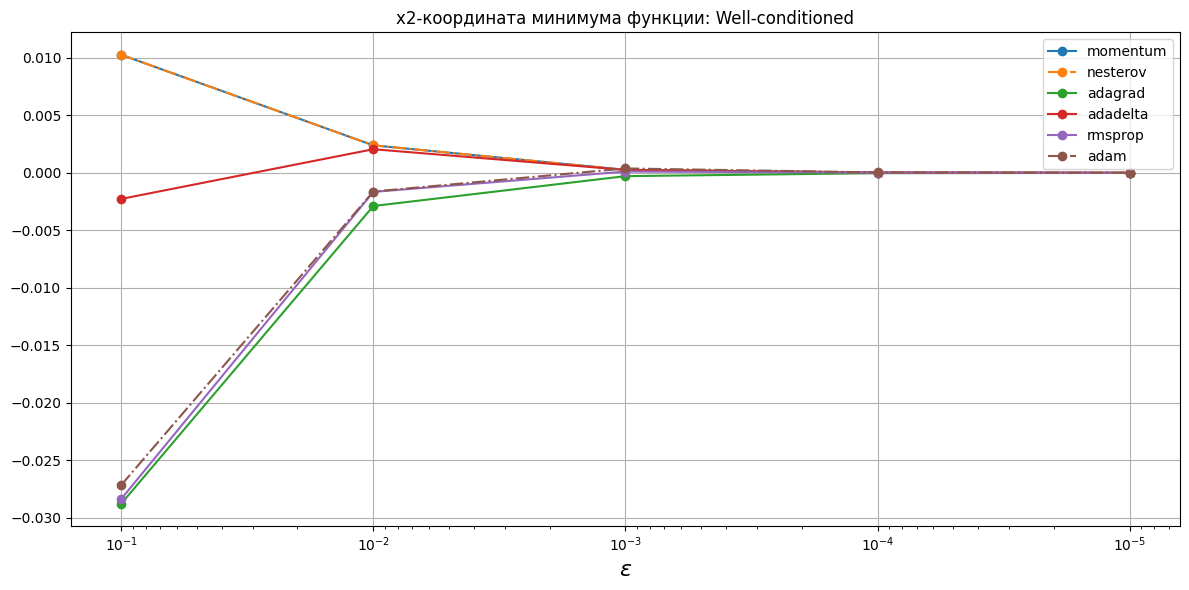

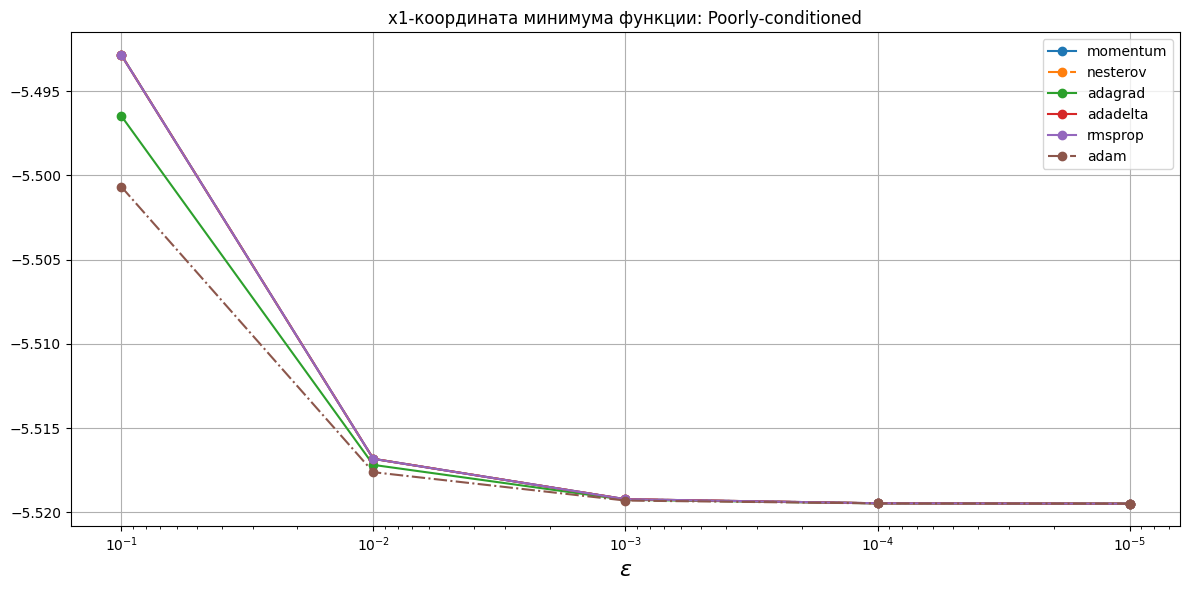

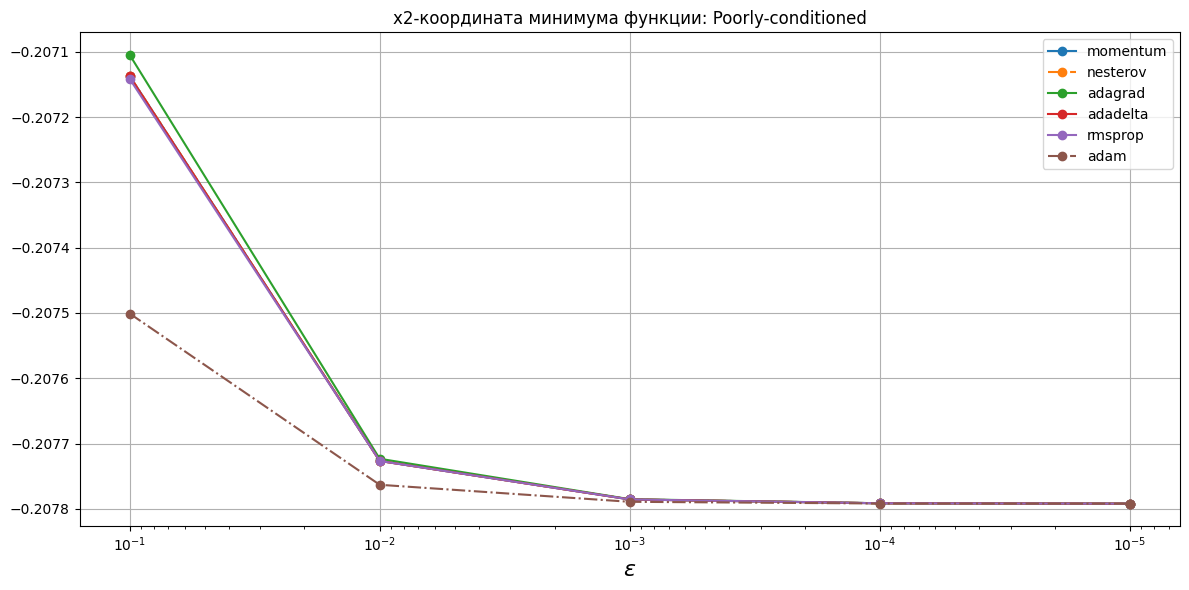

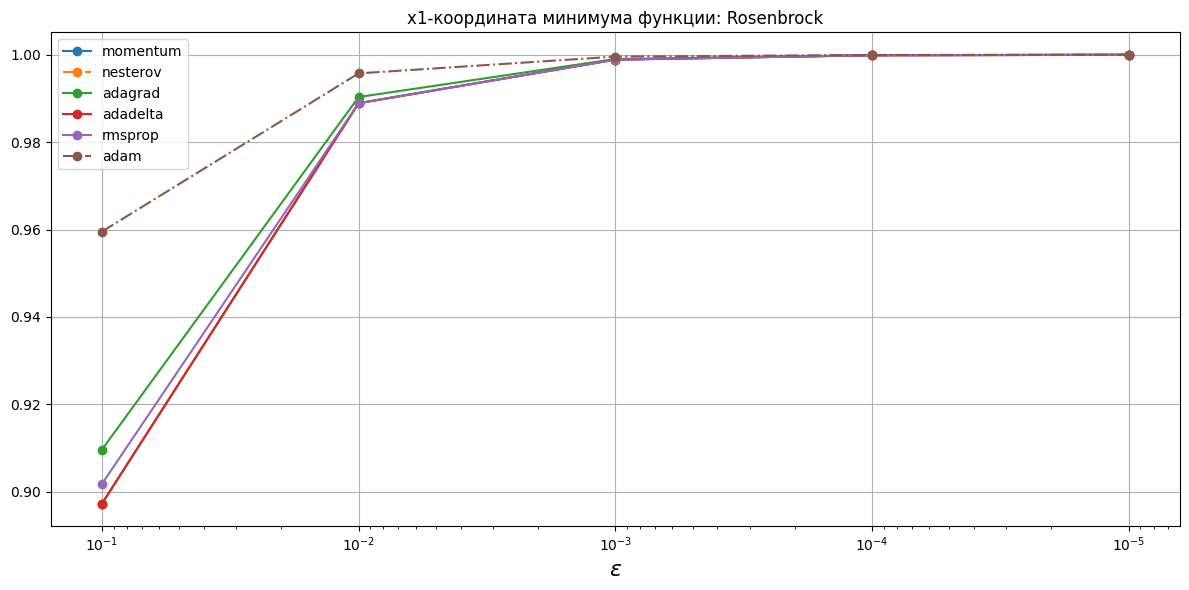

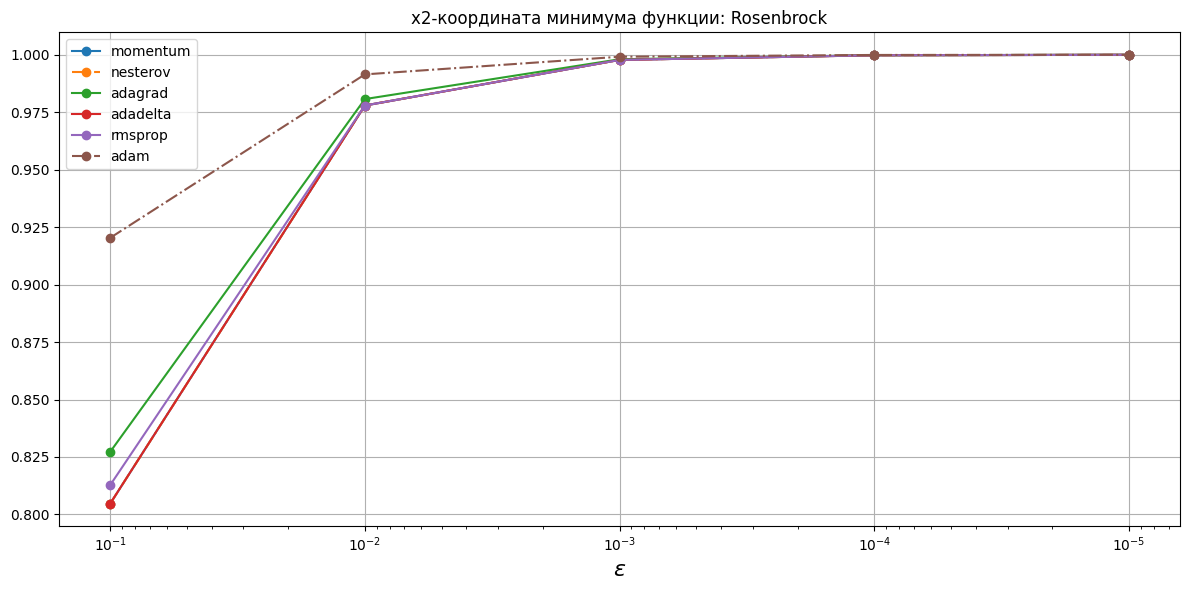

In [9]:
for x_optim_tbl_set_item, func in zip(x_optim_tbl_set, func_labels):
    for idx in range(2):
        plt.figure(figsize=user_figsize)
        for mdx, meth in enumerate(col_name[1:]):
            plt.plot(
                x_optim_tbl_set_item['eps'],
                x_optim_tbl_set_item.iloc[:,(1+idx)+2*mdx],
                label=meth,
                linestyle=line_style[mdx],
                marker='.', markersize=user_markersize)
        plt.gca().invert_xaxis()
        plt.title('x' + str(idx+1) + '-координата минимума функции: ' + func)
        plt.grid()
        plt.legend()
        plt.xscale('log')
        plt.xlabel('$\epsilon$', fontsize=user_fontsize)
        plt.tight_layout()
        plt.savefig('readme_img/descent_img/' + 'x' + str(idx+1) + '_optim_' + func + '.png', bbox_inches='tight')
        plt.show()

## Количество итераций и вычислений

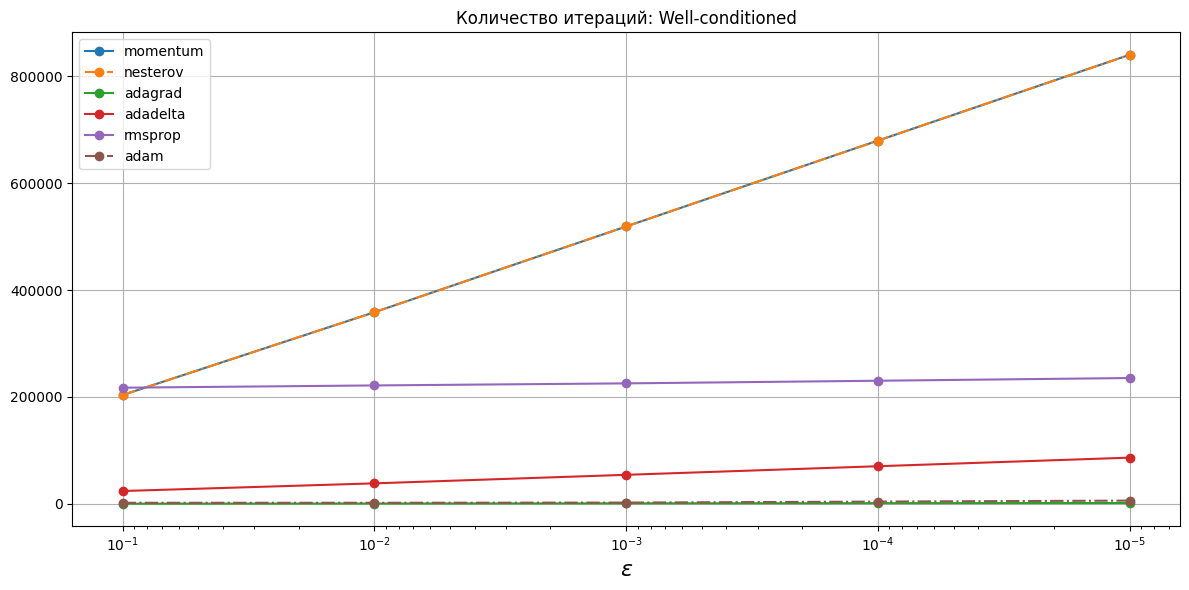

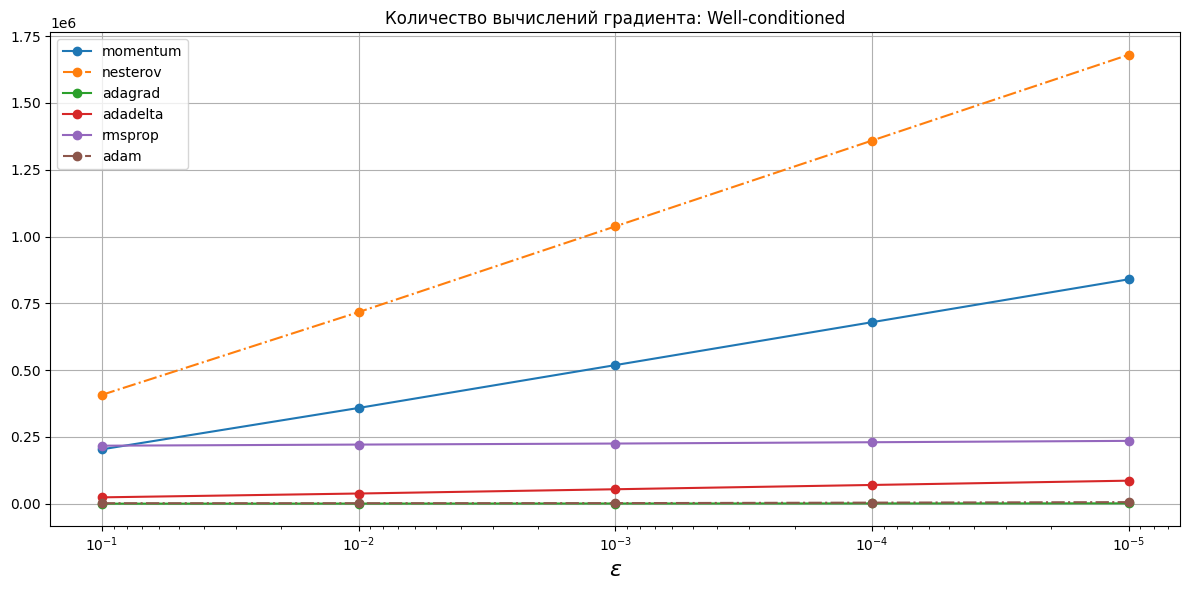

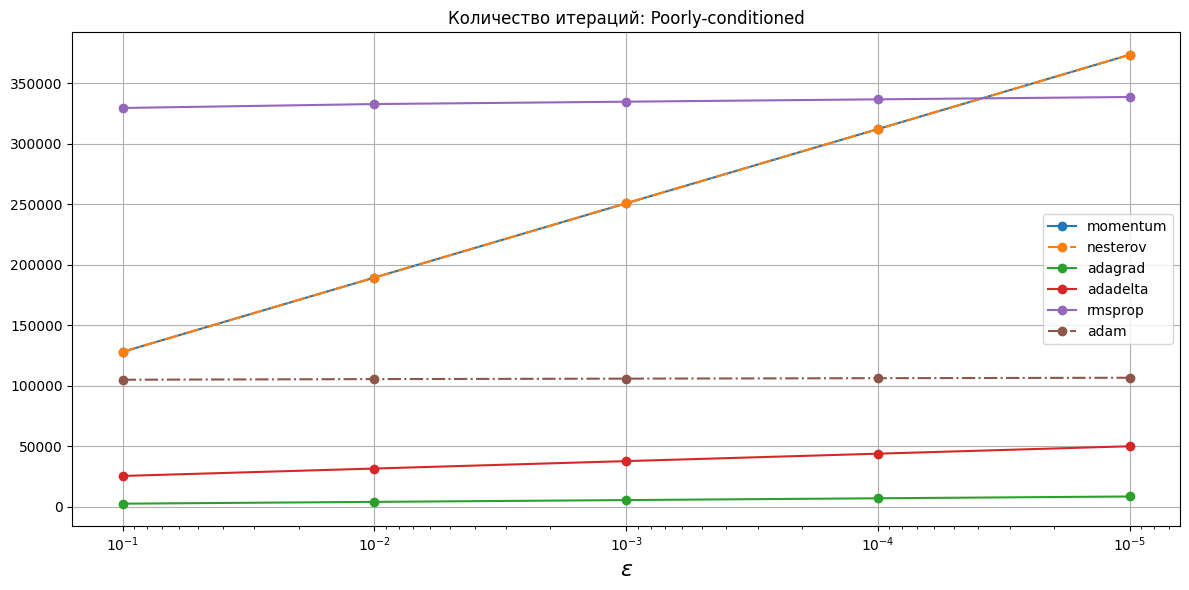

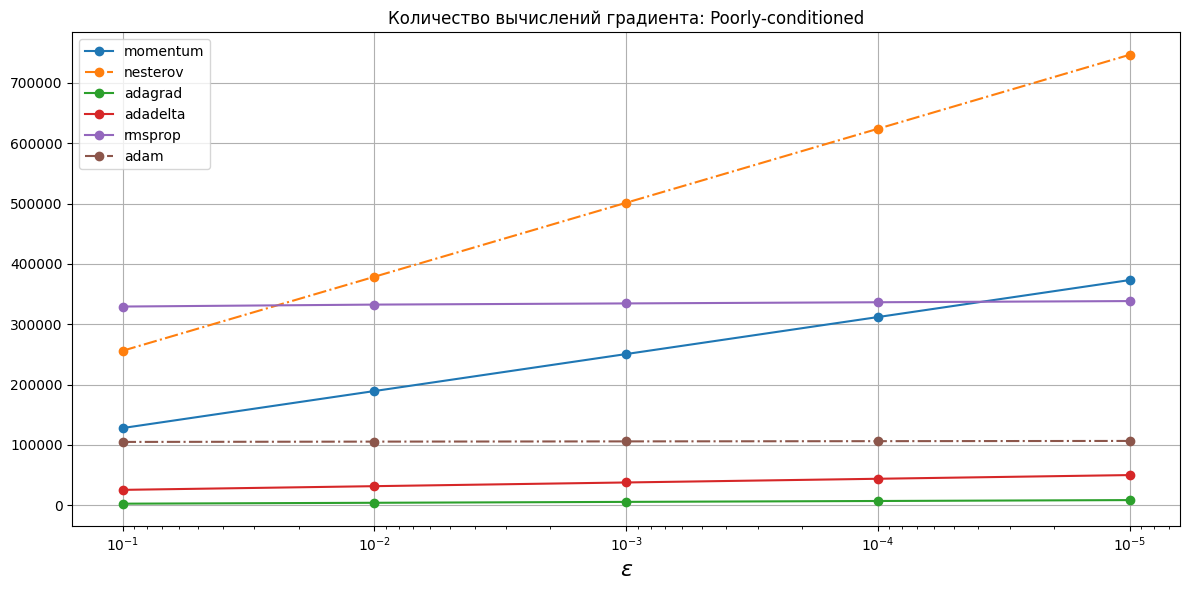

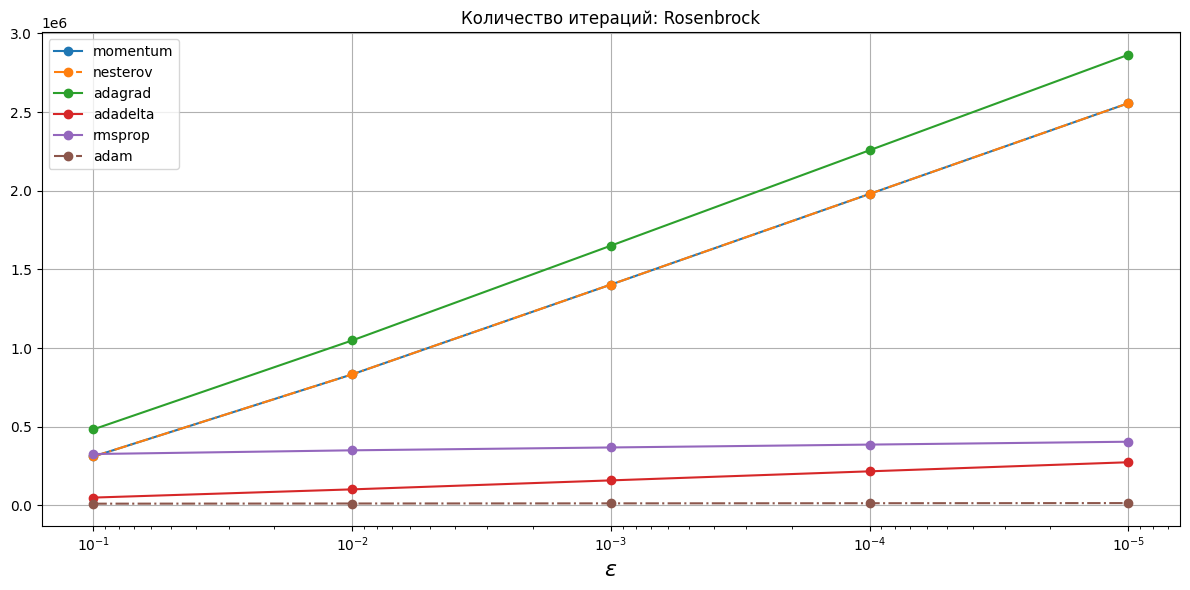

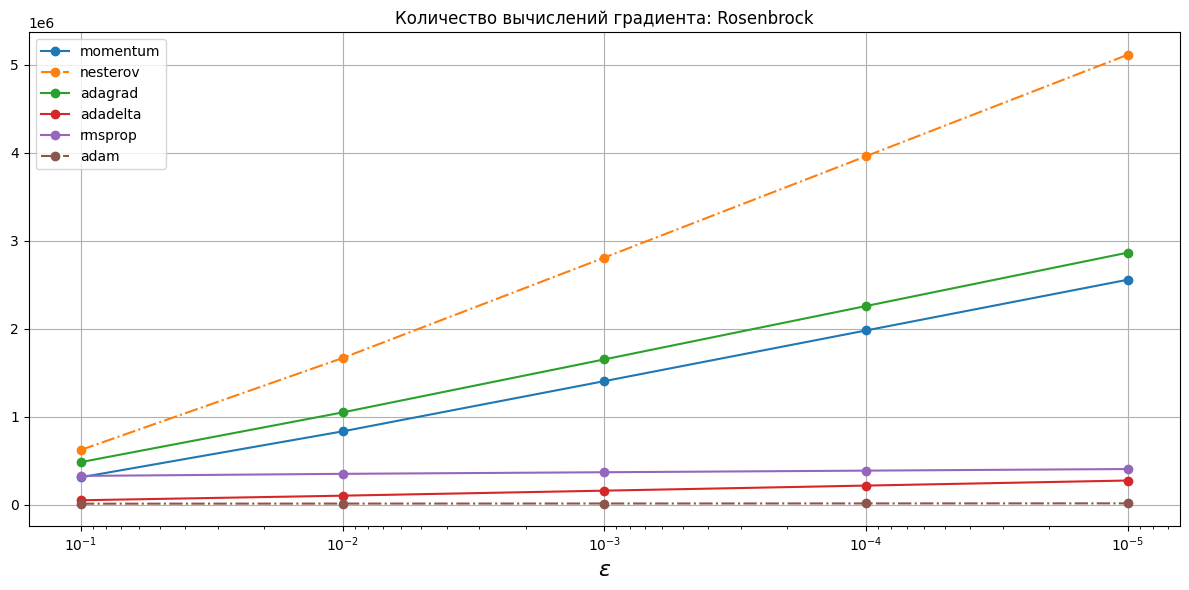

In [10]:
section_names = ['x_optim', 'iter_count', 'grad_count']

for tables_all_item, func in zip(tables_all, func_labels):
    for ttl, tbl, file_name in zip(titles_all[1:], tables_all_item[1:], section_names[1:]):
        plt.figure(figsize=user_figsize)    
        for mdx, meth in enumerate(col_name[1:]):
                plt.plot(
                        tbl['eps'],
                        tbl.iloc[:,1+mdx],
                        label=meth,
                        linestyle=line_style[mdx],
                        marker='.', markersize=user_markersize)
        plt.gca().invert_xaxis()
        plt.title(ttl + ': ' + func)
        plt.grid()
        plt.legend()
        plt.xscale('log')
        plt.xlabel('$\epsilon$', fontsize=user_fontsize)
        plt.tight_layout()
        plt.savefig('readme_img/descent_img/' + file_name + '_' + func + '.png', bbox_inches='tight')
        plt.show()

## Генератор таблиц в приложения

In [11]:
from functions.user_functions import update_readme_section

In [12]:
for tables_all_item, lbl, func_name_item in zip(tables_all, func_labels, func_names):
    for tbl, ttl, section in zip(tables_all_item, titles_all, section_names):
        update_readme_section(tbl, readme_path='descent.md', tbl_name=ttl + ': ' + lbl, section=section + '_' + func_name_item)